### Adversarial Trained Models Evaluation Metrics

In [18]:
# Eval metrics data paths
pretrained_evals = {'SQuAD': './eval_output', 'addCommon': './adv_addCommon/eval_output', 'addAny': './adv_addAny/eval_output', 'addSent': './adv_addSent/eval_output'}
fine_tuned_v1_evals = {'SQuAD': './new_eval_outputs/adv_combined/base_squad', 'addCommon': './new_eval_outputs/adv_combined/adv_addCommon', 'addAny': './new_eval_outputs/adv_combined/adv_addAny', 'addSent': './new_eval_outputs/adv_combined/adv_addSent'}
fine_tuned_v2_evals = {'SQuAD': './new_eval_outputs/adv_combined_v2/base_squad', 'addCommon': './new_eval_outputs/adv_combined_v2/adv_addCommon', 'addAny': './new_eval_outputs/adv_combined_v2/adv_addAny', 'addSent': './new_eval_outputs/adv_combined_v2/adv_addSent'}


#### Base vs Adversarial Sets Only vs Combined Sets Model F1

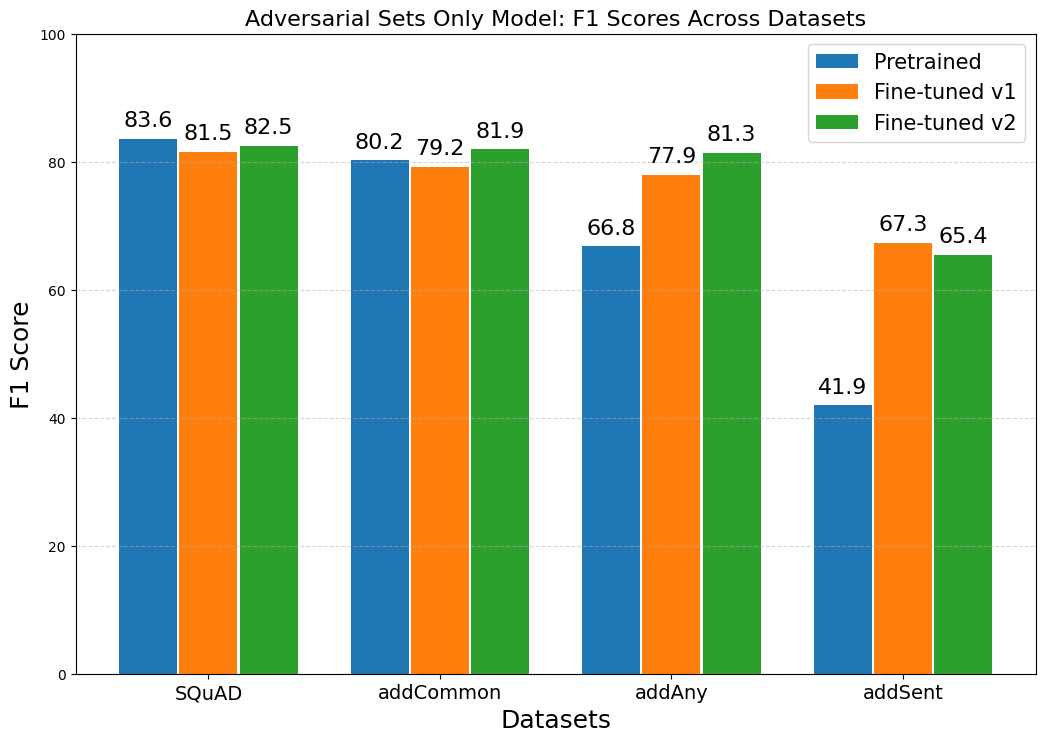

In [89]:
import json
import matplotlib.pyplot as plt

def plot_metric_results(metric, title, yLabel, label_format="%.1f", ylim=(0, 100)):
    # Load the data from the JSON files
    def load_scores(eval_paths):
        scores = {}
        for key, path in eval_paths.items():
            with open(f"{path}/eval_metrics.json", 'r') as file:
                data = json.load(file)
                if metric == 'eval_bleu':
                    scores[key] = data[metric]['bleu']
                elif data[metric] is not None:
                    scores[key] = data[metric]
                else:
                    print(f"Metric {metric} not found in {path}/eval_metrics.json")
        return scores

    pretrained_scores = load_scores(pretrained_evals)
    fine_tuned_v1_scores = load_scores(fine_tuned_v1_evals)
    fine_tuned_v2_scores = load_scores(fine_tuned_v2_evals)

    # Define the datasets
    datasets = list(pretrained_evals.keys())

    # Plot the F1 scores
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.25
    padding = 0.01
    index = range(len(datasets))

    bar1 = plt.bar([i - bar_width - padding for i in index], [pretrained_scores[dataset] for dataset in datasets], bar_width, label='Pretrained')
    bar2 = plt.bar([i for i in index], [fine_tuned_v1_scores[dataset] for dataset in datasets], bar_width, label='Fine-tuned v1')
    bar3 = plt.bar([i + bar_width + padding for i in index], [fine_tuned_v2_scores[dataset] for dataset in datasets], bar_width, label='Fine-tuned v2')

    # Add labels for each bar
    plt.bar_label(bar1, padding=6, fontsize=16, fmt=label_format)
    plt.bar_label(bar2, padding=6, fontsize=16, fmt=label_format)
    plt.bar_label(bar3, padding=6, fontsize=16, fmt=label_format)

    # Add titles and labels
    plt.xlabel('Datasets', fontsize=18)
    plt.ylabel(yLabel, fontsize=18)
    plt.title(title, fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.ylim(ylim)
    plt.xticks([i for i in index], datasets, fontsize=14)
    plt.legend(fontsize=15)  # Increase the font size of the legend


    plt.tight_layout()
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Add padding around the whole chart
    plt.show()

plot_metric_results(metric='eval_f1', yLabel="F1 Score", title='Adversarial Sets Only Model: F1 Scores Across Datasets')

#### Blue Scores Evaluated across Models vs Datasets

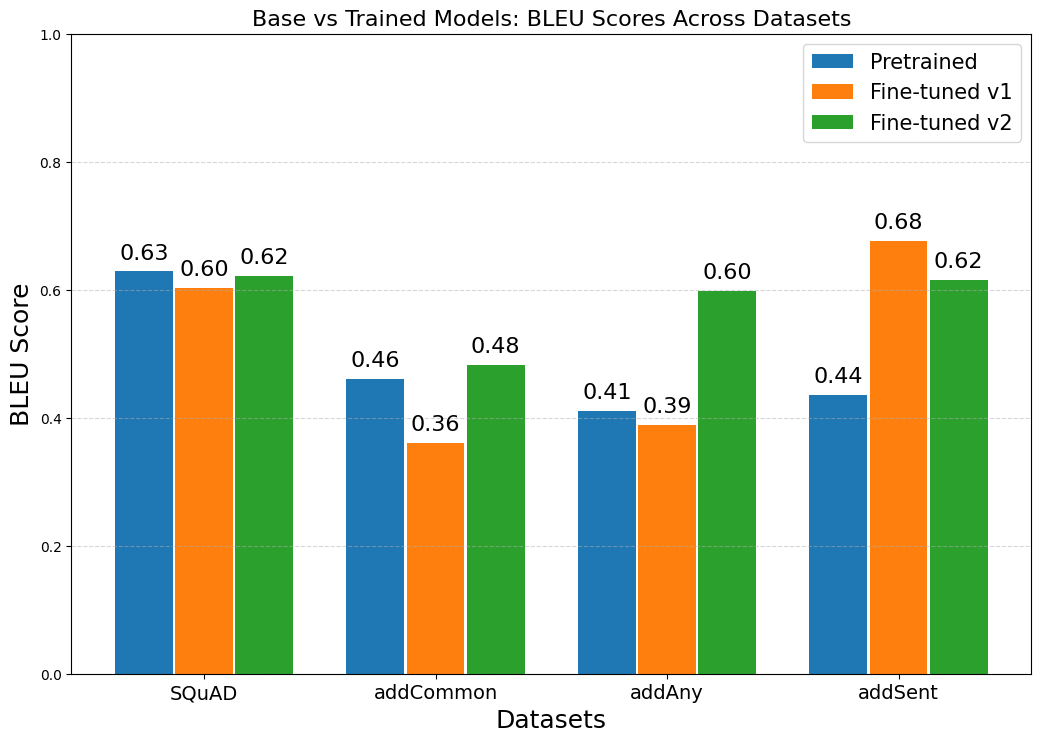

In [90]:
plot_metric_results(metric='eval_bleu', ylim=(0, 1), label_format="%.2f", yLabel="BLEU Score", title='Base vs Trained Models: BLEU Scores Across Datasets')